수치를 입력해서 이진분류할 수 있는 모델들에 대해서 알아보겠습니다. 이진분류를 위한 데이터셋 생성을 해보고, 가장 간단한 퍼셉트론 모델부터 깊은 다층퍼셉트론 모델까지 구성 및 학습을 시켜보겠습니다.

---
### 데이터셋 준비

훈련에 사용할 임의의 값을 가진 인자 12개로 구성된 입력(x) 1000개와 각 입력에 대해 0과 1 중 임의로 지정된 출력(y)를 가지는 데이터셋을 생성해봤습니다. 시험에 사용할 데이터는 100개 준비했습니다.

In [20]:
import numpy as np

# 데이터셋 생성
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

데이터셋의 12개 인자(x) 및 라벨값(y) 모두 무작위 수입니다. 패턴이 없는 데이터이고, 학습하기에 가장 어려운 케이스라 보실 수 있습니다. 물론 패턴이 없기 때문에 이런 데이터로 학습한 모델은 시험셋에서 정확도가 상당히 낮습니다. 하지만 이러한 무작위 데이터를 사용하는 이유는 다음과 같습니다. 

- 패턴이 없는 데이터에서 각 모델들이 얼마나 빨리 학습되는 지 살펴볼 수 있습니다
- 실제 데이터를 사용하기 전에 데이터셋 형태를 설계하거나 모델 프로토타입핑하기에 적절합니다

12개 입력인자 중 첫번째와 두번째 인자 값만 이용하여 2차원으로 데이터 분포를 살펴보겠습니다. 라벨값에 따라 점의 색상을 다르게 표시했습니다. 

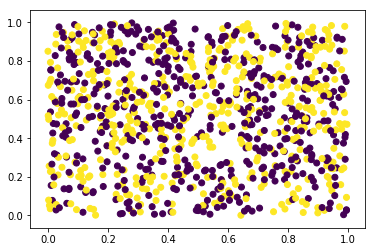

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

# 데이터셋 확인 (2차원)
plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_color = y_train.reshape(1000,)

plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

실제 데이터에서는 첫번째 인자와 두번째 인자사이의 상관관계가 있다면 그래프에서 패턴을 보실 수 있습니다. 우리는 임의의 값으로 데이터셋을 만들었으므로 예상대로 패턴을 찾을 수 없습니다. 이번에는 첫번째, 두번째, 세번째의 인자값을 이용하여 3차원으로 그래프를 확인해보겠습니다.

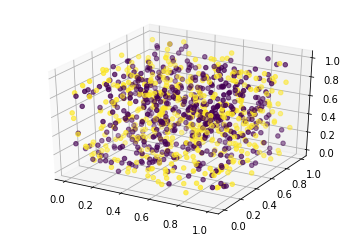

In [22]:
# 데이터셋 확인 (3차원)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_z = x_train[:,2]
plot_color = y_train.reshape(1000,)

ax.scatter(plot_x, plot_y, plot_z, c=plot_color)
plt.show()

역시나 패턴을 찾아볼 수는 없습니다. 하지만 실제 데이터에서는 인자 간의 상관관계가 있을 경우 패턴을 확인할 수 있므으로 이와 같은 방식으로 모델을 설계하기 전에 데이터셋을 먼저 확인해보는 것은 권장해드립니다. 

---
### 레이어 준비

이진분류 모델에 사용할 레이어는 `Dense`와 `Activation`입니다. `Activation`에는 은닉층(hidden layer)에 사용할 `relu`와 출력층(output layer)에 사용할 `sigmoid`입니다. `sigmoid`는 출력값을 0과 1사이의 값으로 변환시키는 역할을 수행합니다. 따라서 특정 임계값(예를 들어 0.5) 이상이면 양성, 이하이면 음성이라고 판별할 수 있는 이진분류 모델이 될 수 있습니다. 데이터셋은 일차원 벡터만 다루도록 하겠습니다.

|종류|구분|상세구분|브릭|
|:-:|:-:|:-:|:-:|
|데이터셋|Vector|-|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|
|레이어|Dense||![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|
|레이어|Activation|relu|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|
|레이어|Activation|sigmoid|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Activation_sigmoid_s.png)|

---
### 모델 준비

이진분류를 하기 위해 `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`을 준비했습니다.

#### 퍼셉트론 모델

Dense 레이어가 하나이고, 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 모델입니다. 즉 웨이트(w) 하나, 바이어스(b) 하나로 전형적인  Y = w * X + b를 풀기 위한 모델입니다. 이진분류이므로 출력 레이어는 sigmoid 활성화 함수를 사용하였습니다.

    model = Sequential()
    model.add(Dense(1, input_dim=12, activation='sigmoid'))
    
또는 활성화 함수를 브릭을 쌓듯이 별로 레이어로 구성하여도 동일한 모델입니다.

    model = Sequential()
    model.add(Dense(1, input_dim=12))
    model.add(Activation('sigmoid'))

![img](http://tykimos.github.com/Keras/warehouse/2017-8-18-Numerical_Input_Binary_Classification_Model_Recipe_1m.png)

#### 다층퍼셉트론 모델

Dense 레이어가 두 개인 다층퍼셉트론 모델입니다. 첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 두 번째 레이어는 0과 1사이의 값 하나를 출력하기 위해 1개의 뉴런과 `sigmoid` 활성화 함수를 사용했습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

![img](http://tykimos.github.com/Keras/warehouse/2017-8-18-Numerical_Input_Binary_Classification_Model_Recipe_2m.png)

#### 깊은 다층퍼셉트론 모델

Dense 레이어가 총 세 개인 다층퍼셉트론 모델입니다. 첫 번째, 두 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 세 번째 레이어는 0과 1사이의 값 하나를 출력하기 위해 1개의 뉴런과 `sigmoid` 활성화 함수를 사용했습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
![img](http://tykimos.github.com/Keras/warehouse/2017-8-18-Numerical_Input_Binary_Classification_Model_Recipe_3m.png)

---
### 전체 소스

앞서 살펴본 `선형회귀 모델`, `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`의 전체 소스는 다음과 같습니다.

#### 퍼셉트론 모델

Epoch 1/1000
1000/1000 [==============================] - 0s - loss: 0.7249 - acc: 0.4900     
Epoch 2/1000
1000/1000 [==============================] - 0s - loss: 0.7241 - acc: 0.4900     
Epoch 3/1000
1000/1000 [==============================] - 0s - loss: 0.7234 - acc: 0.4950     
Epoch 4/1000
1000/1000 [==============================] - 0s - loss: 0.7228 - acc: 0.4900     
Epoch 5/1000
1000/1000 [==============================] - 0s - loss: 0.7223 - acc: 0.4900     
Epoch 6/1000
1000/1000 [==============================] - 0s - loss: 0.7217 - acc: 0.4900     
Epoch 7/1000
1000/1000 [==============================] - 0s - loss: 0.7213 - acc: 0.4880     
Epoch 8/1000
1000/1000 [==============================] - 0s - loss: 0.7207 - acc: 0.4900     
Epoch 9/1000
1000/1000 [==============================] - 0s - loss: 0.7201 - acc: 0.4890     
Epoch 10/1000
1000/1000 [==============================] - 0s - loss: 0.7195 - acc: 0.4860     
Epoch 11/1000
1000/1000 [========================

1000/1000 [==============================] - 0s - loss: 0.6954 - acc: 0.5020     
Epoch 87/1000
1000/1000 [==============================] - 0s - loss: 0.6953 - acc: 0.5100     
Epoch 88/1000
1000/1000 [==============================] - 0s - loss: 0.6950 - acc: 0.5040     
Epoch 89/1000
1000/1000 [==============================] - 0s - loss: 0.6949 - acc: 0.5040     
Epoch 90/1000
1000/1000 [==============================] - 0s - loss: 0.6947 - acc: 0.5090     
Epoch 91/1000
1000/1000 [==============================] - 0s - loss: 0.6946 - acc: 0.5100     
Epoch 92/1000
1000/1000 [==============================] - 0s - loss: 0.6944 - acc: 0.5110     
Epoch 93/1000
1000/1000 [==============================] - 0s - loss: 0.6944 - acc: 0.5110     
Epoch 94/1000
1000/1000 [==============================] - 0s - loss: 0.6941 - acc: 0.5120     
Epoch 95/1000
1000/1000 [==============================] - 0s - loss: 0.6940 - acc: 0.5120     
Epoch 96/1000
1000/1000 [=============================

1000/1000 [==============================] - 0s - loss: 0.6875 - acc: 0.5300     
Epoch 170/1000
1000/1000 [==============================] - 0s - loss: 0.6874 - acc: 0.5270     
Epoch 171/1000
1000/1000 [==============================] - 0s - loss: 0.6873 - acc: 0.5330     
Epoch 172/1000
1000/1000 [==============================] - 0s - loss: 0.6873 - acc: 0.5340     
Epoch 173/1000
1000/1000 [==============================] - 0s - loss: 0.6872 - acc: 0.5350     
Epoch 174/1000
1000/1000 [==============================] - 0s - loss: 0.6873 - acc: 0.5330     
Epoch 175/1000
1000/1000 [==============================] - 0s - loss: 0.6873 - acc: 0.5300     
Epoch 176/1000
1000/1000 [==============================] - 0s - loss: 0.6871 - acc: 0.5350     
Epoch 177/1000
1000/1000 [==============================] - 0s - loss: 0.6871 - acc: 0.5400     
Epoch 178/1000
1000/1000 [==============================] - 0s - loss: 0.6870 - acc: 0.5330     
Epoch 179/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.6854 - acc: 0.5390     
Epoch 254/1000
1000/1000 [==============================] - 0s - loss: 0.6853 - acc: 0.5390     
Epoch 255/1000
1000/1000 [==============================] - 0s - loss: 0.6853 - acc: 0.5340     
Epoch 256/1000
1000/1000 [==============================] - 0s - loss: 0.6853 - acc: 0.5370     
Epoch 257/1000
1000/1000 [==============================] - 0s - loss: 0.6853 - acc: 0.5390     
Epoch 258/1000
1000/1000 [==============================] - 0s - loss: 0.6853 - acc: 0.5420     
Epoch 259/1000
1000/1000 [==============================] - 0s - loss: 0.6853 - acc: 0.5420     
Epoch 260/1000
1000/1000 [==============================] - 0s - loss: 0.6852 - acc: 0.5410     
Epoch 261/1000
1000/1000 [==============================] - 0s - loss: 0.6852 - acc: 0.5360     
Epoch 262/1000
1000/1000 [==============================] - 0s - loss: 0.6852 - acc: 0.5380     
Epoch 263/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.6848 - acc: 0.5510     
Epoch 338/1000
1000/1000 [==============================] - 0s - loss: 0.6847 - acc: 0.5440     
Epoch 339/1000
1000/1000 [==============================] - 0s - loss: 0.6848 - acc: 0.5430     
Epoch 340/1000
1000/1000 [==============================] - 0s - loss: 0.6848 - acc: 0.5470     
Epoch 341/1000
1000/1000 [==============================] - 0s - loss: 0.6849 - acc: 0.5460     
Epoch 342/1000
1000/1000 [==============================] - 0s - loss: 0.6847 - acc: 0.5500     
Epoch 343/1000
1000/1000 [==============================] - 0s - loss: 0.6847 - acc: 0.5500     
Epoch 344/1000
1000/1000 [==============================] - 0s - loss: 0.6848 - acc: 0.5420     
Epoch 345/1000
1000/1000 [==============================] - 0s - loss: 0.6848 - acc: 0.5440     
Epoch 346/1000
1000/1000 [==============================] - 0s - loss: 0.6847 - acc: 0.5440     
Epoch 347/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.6846 - acc: 0.5460     
Epoch 422/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5490     
Epoch 423/1000
1000/1000 [==============================] - 0s - loss: 0.6846 - acc: 0.5570     
Epoch 424/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5480     
Epoch 425/1000
1000/1000 [==============================] - 0s - loss: 0.6846 - acc: 0.5460     
Epoch 426/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.6879 - acc: 0.593 - 0s - loss: 0.6845 - acc: 0.5480     
Epoch 427/1000
1000/1000 [==============================] - 0s - loss: 0.6846 - acc: 0.5470     
Epoch 428/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5510     
Epoch 429/1000
1000/1000 [==============================] - 0s - loss: 0.6846 - acc: 0.5480     
Epoch 430/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5470     
Epoch 4

1000/1000 [==============================] - 0s - loss: 0.6846 - acc: 0.5480     
Epoch 505/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5460     
Epoch 506/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5490     
Epoch 507/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5470     
Epoch 508/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5470     
Epoch 509/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5470     
Epoch 510/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5500     
Epoch 511/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5490     
Epoch 512/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5490     
Epoch 513/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5460     
Epoch 514/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5490     
Epoch 589/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5490     
Epoch 590/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5510     
Epoch 591/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5540     
Epoch 592/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5490     
Epoch 593/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5450     
Epoch 594/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5530     
Epoch 595/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5470     
Epoch 596/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5490     
Epoch 597/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5510     
Epoch 598/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5440     
Epoch 673/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5460     
Epoch 674/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5490     
Epoch 675/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5500     
Epoch 676/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.6972 - acc: 0.484 - 0s - loss: 0.6843 - acc: 0.5530     
Epoch 677/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5460     
Epoch 678/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5500     
Epoch 679/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5500     
Epoch 680/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5490     
Epoch 681/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5490     
Epoch 6

1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5510     
Epoch 757/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5520     
Epoch 758/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5500     
Epoch 759/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5540     
Epoch 760/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5510     
Epoch 761/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5510     
Epoch 762/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5550     
Epoch 763/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5520     
Epoch 764/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5520     
Epoch 765/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5520     
Epoch 766/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.6842 - acc: 0.5470     
Epoch 841/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5490     
Epoch 842/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5530     
Epoch 843/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5520     
Epoch 844/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5520     
Epoch 845/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5480     
Epoch 846/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5550     
Epoch 847/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5480     
Epoch 848/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5510     
Epoch 849/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5540     
Epoch 850/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5480     
Epoch 925/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5490     
Epoch 926/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5530     
Epoch 927/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5500     
Epoch 928/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5480     
Epoch 929/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5500     
Epoch 930/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5540     
Epoch 931/1000
1000/1000 [==============================] - 0s - loss: 0.6845 - acc: 0.5470     
Epoch 932/1000
1000/1000 [==============================] - 0s - loss: 0.6842 - acc: 0.5500     
Epoch 933/1000
1000/1000 [==============================] - 0s - loss: 0.6843 - acc: 0.5500     
Epoch 934/1000
1000/1000 [===================

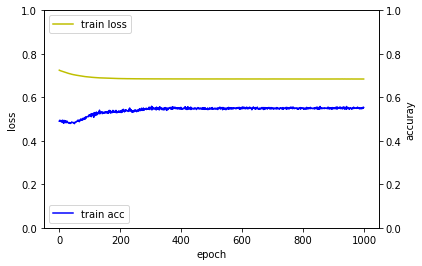

In [34]:
# 퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=12, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#### 다층퍼셉트론 모델

Epoch 1/1000
1000/1000 [==============================] - 0s - loss: 0.6988 - acc: 0.5180     
Epoch 2/1000
1000/1000 [==============================] - 0s - loss: 0.6942 - acc: 0.5350     
Epoch 3/1000
1000/1000 [==============================] - 0s - loss: 0.6921 - acc: 0.5370     
Epoch 4/1000
1000/1000 [==============================] - 0s - loss: 0.6914 - acc: 0.5160     
Epoch 5/1000
1000/1000 [==============================] - 0s - loss: 0.6912 - acc: 0.5270     
Epoch 6/1000
1000/1000 [==============================] - 0s - loss: 0.6896 - acc: 0.5370     
Epoch 7/1000
1000/1000 [==============================] - 0s - loss: 0.6894 - acc: 0.5440     
Epoch 8/1000
1000/1000 [==============================] - 0s - loss: 0.6884 - acc: 0.5450     
Epoch 9/1000
1000/1000 [==============================] - 0s - loss: 0.6884 - acc: 0.5480     
Epoch 10/1000
1000/1000 [==============================] - 0s - loss: 0.6877 - acc: 0.5460     
Epoch 11/1000
1000/1000 [========================

1000/1000 [==============================] - 0s - loss: 0.6564 - acc: 0.6260     
Epoch 87/1000
1000/1000 [==============================] - 0s - loss: 0.6552 - acc: 0.6410     
Epoch 88/1000
1000/1000 [==============================] - 0s - loss: 0.6551 - acc: 0.6360     
Epoch 89/1000
1000/1000 [==============================] - 0s - loss: 0.6549 - acc: 0.6310     
Epoch 90/1000
1000/1000 [==============================] - 0s - loss: 0.6539 - acc: 0.6370     
Epoch 91/1000
1000/1000 [==============================] - 0s - loss: 0.6537 - acc: 0.6140     
Epoch 92/1000
1000/1000 [==============================] - 0s - loss: 0.6526 - acc: 0.6340     
Epoch 93/1000
1000/1000 [==============================] - 0s - loss: 0.6531 - acc: 0.6400     
Epoch 94/1000
1000/1000 [==============================] - 0s - loss: 0.6521 - acc: 0.6330     
Epoch 95/1000
1000/1000 [==============================] - 0s - loss: 0.6526 - acc: 0.6310     
Epoch 96/1000
1000/1000 [=============================

1000/1000 [==============================] - 0s - loss: 0.6214 - acc: 0.6790     
Epoch 171/1000
1000/1000 [==============================] - 0s - loss: 0.6194 - acc: 0.6820     
Epoch 172/1000
1000/1000 [==============================] - 0s - loss: 0.6198 - acc: 0.6850     
Epoch 173/1000
1000/1000 [==============================] - 0s - loss: 0.6194 - acc: 0.6750     
Epoch 174/1000
1000/1000 [==============================] - 0s - loss: 0.6181 - acc: 0.6830     
Epoch 175/1000
1000/1000 [==============================] - 0s - loss: 0.6184 - acc: 0.6740     
Epoch 176/1000
1000/1000 [==============================] - 0s - loss: 0.6179 - acc: 0.6810     
Epoch 177/1000
1000/1000 [==============================] - 0s - loss: 0.6182 - acc: 0.6800     
Epoch 178/1000
1000/1000 [==============================] - 0s - loss: 0.6165 - acc: 0.6850     
Epoch 179/1000
1000/1000 [==============================] - 0s - loss: 0.6168 - acc: 0.6920     
Epoch 180/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.5888 - acc: 0.7050     
Epoch 255/1000
1000/1000 [==============================] - 0s - loss: 0.5890 - acc: 0.7040     
Epoch 256/1000
1000/1000 [==============================] - 0s - loss: 0.5883 - acc: 0.7030     
Epoch 257/1000
1000/1000 [==============================] - 0s - loss: 0.5865 - acc: 0.7110     
Epoch 258/1000
1000/1000 [==============================] - 0s - loss: 0.5901 - acc: 0.7080     
Epoch 259/1000
1000/1000 [==============================] - 0s - loss: 0.5876 - acc: 0.7110     
Epoch 260/1000
1000/1000 [==============================] - 0s - loss: 0.5888 - acc: 0.7090     
Epoch 261/1000
1000/1000 [==============================] - 0s - loss: 0.5861 - acc: 0.7110     
Epoch 262/1000
1000/1000 [==============================] - 0s - loss: 0.5875 - acc: 0.7070     
Epoch 263/1000
1000/1000 [==============================] - 0s - loss: 0.5858 - acc: 0.7180     
Epoch 264/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.5632 - acc: 0.7240     
Epoch 338/1000
1000/1000 [==============================] - 0s - loss: 0.5617 - acc: 0.7200     
Epoch 339/1000
1000/1000 [==============================] - 0s - loss: 0.5603 - acc: 0.7320     
Epoch 340/1000
1000/1000 [==============================] - 0s - loss: 0.5649 - acc: 0.7140     
Epoch 341/1000
1000/1000 [==============================] - 0s - loss: 0.5598 - acc: 0.7290     
Epoch 342/1000
1000/1000 [==============================] - 0s - loss: 0.5621 - acc: 0.7250     
Epoch 343/1000
1000/1000 [==============================] - 0s - loss: 0.5611 - acc: 0.7300     
Epoch 344/1000
1000/1000 [==============================] - 0s - loss: 0.5614 - acc: 0.7260     
Epoch 345/1000
1000/1000 [==============================] - 0s - loss: 0.5615 - acc: 0.7290     
Epoch 346/1000
1000/1000 [==============================] - 0s - loss: 0.5612 - acc: 0.7320     
Epoch 347/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.5384 - acc: 0.7410     
Epoch 422/1000
1000/1000 [==============================] - 0s - loss: 0.5383 - acc: 0.7550     
Epoch 423/1000
1000/1000 [==============================] - 0s - loss: 0.5385 - acc: 0.7490     
Epoch 424/1000
1000/1000 [==============================] - 0s - loss: 0.5377 - acc: 0.7530     
Epoch 425/1000
1000/1000 [==============================] - 0s - loss: 0.5389 - acc: 0.7490     
Epoch 426/1000
1000/1000 [==============================] - 0s - loss: 0.5370 - acc: 0.7440     
Epoch 427/1000
1000/1000 [==============================] - 0s - loss: 0.5375 - acc: 0.7460     
Epoch 428/1000
1000/1000 [==============================] - 0s - loss: 0.5385 - acc: 0.7500     
Epoch 429/1000
1000/1000 [==============================] - 0s - loss: 0.5382 - acc: 0.7400     
Epoch 430/1000
1000/1000 [==============================] - 0s - loss: 0.5377 - acc: 0.7450     
Epoch 431/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.5197 - acc: 0.7540     
Epoch 506/1000
1000/1000 [==============================] - 0s - loss: 0.5182 - acc: 0.7580     
Epoch 507/1000
1000/1000 [==============================] - 0s - loss: 0.5190 - acc: 0.7610     
Epoch 508/1000
1000/1000 [==============================] - 0s - loss: 0.5179 - acc: 0.7610     
Epoch 509/1000
1000/1000 [==============================] - 0s - loss: 0.5197 - acc: 0.7590     
Epoch 510/1000
1000/1000 [==============================] - 0s - loss: 0.5178 - acc: 0.7660     
Epoch 511/1000
1000/1000 [==============================] - 0s - loss: 0.5177 - acc: 0.7580     
Epoch 512/1000
1000/1000 [==============================] - 0s - loss: 0.5181 - acc: 0.7580     
Epoch 513/1000
1000/1000 [==============================] - 0s - loss: 0.5176 - acc: 0.7540     
Epoch 514/1000
1000/1000 [==============================] - 0s - loss: 0.5178 - acc: 0.7590     
Epoch 515/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.5016 - acc: 0.7730     
Epoch 590/1000
1000/1000 [==============================] - 0s - loss: 0.5011 - acc: 0.7670     
Epoch 591/1000
1000/1000 [==============================] - 0s - loss: 0.4999 - acc: 0.7630     
Epoch 592/1000
1000/1000 [==============================] - 0s - loss: 0.5003 - acc: 0.7730     
Epoch 593/1000
1000/1000 [==============================] - 0s - loss: 0.4995 - acc: 0.7640     
Epoch 594/1000
1000/1000 [==============================] - 0s - loss: 0.4992 - acc: 0.7670     
Epoch 595/1000
1000/1000 [==============================] - 0s - loss: 0.5013 - acc: 0.7730     
Epoch 596/1000
1000/1000 [==============================] - 0s - loss: 0.4966 - acc: 0.7650     
Epoch 597/1000
1000/1000 [==============================] - 0s - loss: 0.4992 - acc: 0.7740     
Epoch 598/1000
1000/1000 [==============================] - 0s - loss: 0.4983 - acc: 0.7810     
Epoch 599/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.4820 - acc: 0.7740     
Epoch 674/1000
1000/1000 [==============================] - 0s - loss: 0.4806 - acc: 0.7840     
Epoch 675/1000
1000/1000 [==============================] - 0s - loss: 0.4842 - acc: 0.7780     
Epoch 676/1000
1000/1000 [==============================] - 0s - loss: 0.4813 - acc: 0.7730     
Epoch 677/1000
1000/1000 [==============================] - 0s - loss: 0.4836 - acc: 0.7720     
Epoch 678/1000
1000/1000 [==============================] - 0s - loss: 0.4811 - acc: 0.7860     
Epoch 679/1000
1000/1000 [==============================] - 0s - loss: 0.4805 - acc: 0.7800     
Epoch 680/1000
1000/1000 [==============================] - 0s - loss: 0.4807 - acc: 0.7870     
Epoch 681/1000
1000/1000 [==============================] - 0s - loss: 0.4811 - acc: 0.7820     
Epoch 682/1000
1000/1000 [==============================] - 0s - loss: 0.4801 - acc: 0.7830     
Epoch 683/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.4651 - acc: 0.7830     
Epoch 758/1000
1000/1000 [==============================] - 0s - loss: 0.4648 - acc: 0.7940     
Epoch 759/1000
1000/1000 [==============================] - 0s - loss: 0.4646 - acc: 0.7840     
Epoch 760/1000
1000/1000 [==============================] - 0s - loss: 0.4653 - acc: 0.7960     
Epoch 761/1000
1000/1000 [==============================] - 0s - loss: 0.4647 - acc: 0.7890     
Epoch 762/1000
1000/1000 [==============================] - 0s - loss: 0.4625 - acc: 0.8030     
Epoch 763/1000
1000/1000 [==============================] - 0s - loss: 0.4635 - acc: 0.8000     
Epoch 764/1000
1000/1000 [==============================] - 0s - loss: 0.4635 - acc: 0.7930     
Epoch 765/1000
1000/1000 [==============================] - 0s - loss: 0.4629 - acc: 0.7900     
Epoch 766/1000
1000/1000 [==============================] - 0s - loss: 0.4608 - acc: 0.7920     
Epoch 767/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.4505 - acc: 0.8060     
Epoch 842/1000
1000/1000 [==============================] - 0s - loss: 0.4506 - acc: 0.7960     
Epoch 843/1000
1000/1000 [==============================] - 0s - loss: 0.4504 - acc: 0.8030     
Epoch 844/1000
1000/1000 [==============================] - 0s - loss: 0.4461 - acc: 0.8030     
Epoch 845/1000
1000/1000 [==============================] - 0s - loss: 0.4509 - acc: 0.7940     
Epoch 846/1000
1000/1000 [==============================] - 0s - loss: 0.4482 - acc: 0.8010     
Epoch 847/1000
1000/1000 [==============================] - 0s - loss: 0.4476 - acc: 0.8100     
Epoch 848/1000
1000/1000 [==============================] - 0s - loss: 0.4497 - acc: 0.7940     
Epoch 849/1000
1000/1000 [==============================] - 0s - loss: 0.4471 - acc: 0.8060     
Epoch 850/1000
1000/1000 [==============================] - 0s - loss: 0.4474 - acc: 0.8020     
Epoch 851/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.4349 - acc: 0.8130     
Epoch 926/1000
1000/1000 [==============================] - 0s - loss: 0.4349 - acc: 0.8070     
Epoch 927/1000
1000/1000 [==============================] - 0s - loss: 0.4364 - acc: 0.8060     
Epoch 928/1000
1000/1000 [==============================] - 0s - loss: 0.4379 - acc: 0.8020     
Epoch 929/1000
1000/1000 [==============================] - 0s - loss: 0.4348 - acc: 0.8140     
Epoch 930/1000
1000/1000 [==============================] - 0s - loss: 0.4367 - acc: 0.8120     
Epoch 931/1000
1000/1000 [==============================] - 0s - loss: 0.4336 - acc: 0.8110     
Epoch 932/1000
1000/1000 [==============================] - 0s - loss: 0.4358 - acc: 0.8100     
Epoch 933/1000
1000/1000 [==============================] - 0s - loss: 0.4342 - acc: 0.8130     
Epoch 934/1000
1000/1000 [==============================] - 0s - loss: 0.4333 - acc: 0.7980     
Epoch 935/1000
1000/1000 [===================

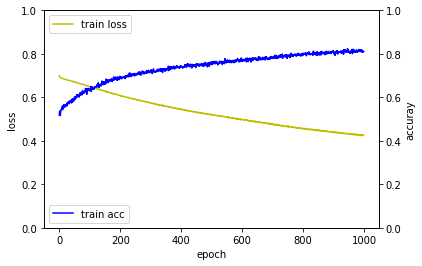

In [35]:
# 다층퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#### 깊은 다층퍼셉트론 모델

Epoch 1/1000
1000/1000 [==============================] - 0s - loss: 0.6954 - acc: 0.5190     
Epoch 2/1000
1000/1000 [==============================] - 0s - loss: 0.6922 - acc: 0.5350     
Epoch 3/1000
1000/1000 [==============================] - 0s - loss: 0.6908 - acc: 0.5330     
Epoch 4/1000
1000/1000 [==============================] - 0s - loss: 0.6892 - acc: 0.5360     
Epoch 5/1000
1000/1000 [==============================] - 0s - loss: 0.6882 - acc: 0.5430     
Epoch 6/1000
1000/1000 [==============================] - 0s - loss: 0.6870 - acc: 0.5520     
Epoch 7/1000
1000/1000 [==============================] - 0s - loss: 0.6854 - acc: 0.5670     
Epoch 8/1000
1000/1000 [==============================] - 0s - loss: 0.6844 - acc: 0.5760     
Epoch 9/1000
1000/1000 [==============================] - 0s - loss: 0.6834 - acc: 0.5430     
Epoch 10/1000
1000/1000 [==============================] - 0s - loss: 0.6829 - acc: 0.5690     
Epoch 11/1000
1000/1000 [========================

1000/1000 [==============================] - 0s - loss: 0.5478 - acc: 0.7370     
Epoch 87/1000
1000/1000 [==============================] - 0s - loss: 0.5452 - acc: 0.7430     
Epoch 88/1000
1000/1000 [==============================] - 0s - loss: 0.5430 - acc: 0.7420     
Epoch 89/1000
1000/1000 [==============================] - 0s - loss: 0.5392 - acc: 0.7370     
Epoch 90/1000
1000/1000 [==============================] - 0s - loss: 0.5395 - acc: 0.7230     
Epoch 91/1000
1000/1000 [==============================] - 0s - loss: 0.5352 - acc: 0.7370     
Epoch 92/1000
1000/1000 [==============================] - 0s - loss: 0.5315 - acc: 0.7380     
Epoch 93/1000
1000/1000 [==============================] - 0s - loss: 0.5367 - acc: 0.7430     
Epoch 94/1000
1000/1000 [==============================] - 0s - loss: 0.5319 - acc: 0.7460     
Epoch 95/1000
1000/1000 [==============================] - 0s - loss: 0.5315 - acc: 0.7500     
Epoch 96/1000
1000/1000 [=============================

1000/1000 [==============================] - 0s - loss: 0.4134 - acc: 0.8190     
Epoch 171/1000
1000/1000 [==============================] - 0s - loss: 0.4168 - acc: 0.8190     
Epoch 172/1000
1000/1000 [==============================] - 0s - loss: 0.4088 - acc: 0.8310     
Epoch 173/1000
1000/1000 [==============================] - 0s - loss: 0.4039 - acc: 0.8340     
Epoch 174/1000
1000/1000 [==============================] - 0s - loss: 0.4182 - acc: 0.8120     
Epoch 175/1000
1000/1000 [==============================] - 0s - loss: 0.4051 - acc: 0.8370     
Epoch 176/1000
1000/1000 [==============================] - 0s - loss: 0.4143 - acc: 0.8270     
Epoch 177/1000
1000/1000 [==============================] - 0s - loss: 0.4068 - acc: 0.8300     
Epoch 178/1000
1000/1000 [==============================] - 0s - loss: 0.4075 - acc: 0.8290     
Epoch 179/1000
1000/1000 [==============================] - 0s - loss: 0.4018 - acc: 0.8360     
Epoch 180/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.3116 - acc: 0.8880     
Epoch 255/1000
1000/1000 [==============================] - 0s - loss: 0.3053 - acc: 0.9010     
Epoch 256/1000
1000/1000 [==============================] - 0s - loss: 0.3235 - acc: 0.8750     
Epoch 257/1000
1000/1000 [==============================] - 0s - loss: 0.3069 - acc: 0.8850     
Epoch 258/1000
1000/1000 [==============================] - 0s - loss: 0.3117 - acc: 0.8850     
Epoch 259/1000
1000/1000 [==============================] - 0s - loss: 0.3130 - acc: 0.8880     
Epoch 260/1000
1000/1000 [==============================] - 0s - loss: 0.3004 - acc: 0.8800     
Epoch 261/1000
1000/1000 [==============================] - 0s - loss: 0.3157 - acc: 0.8800     
Epoch 262/1000
1000/1000 [==============================] - 0s - loss: 0.3118 - acc: 0.8830     
Epoch 263/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.3356 - acc: 0.843 - 0s - loss: 0.3077 - acc: 0.8930     
Epoch 2

1000/1000 [==============================] - 0s - loss: 0.2322 - acc: 0.9290     
Epoch 338/1000
1000/1000 [==============================] - 0s - loss: 0.2416 - acc: 0.9190     
Epoch 339/1000
1000/1000 [==============================] - 0s - loss: 0.2360 - acc: 0.9240     
Epoch 340/1000
1000/1000 [==============================] - 0s - loss: 0.2256 - acc: 0.9330     
Epoch 341/1000
1000/1000 [==============================] - 0s - loss: 0.2329 - acc: 0.9270     
Epoch 342/1000
1000/1000 [==============================] - 0s - loss: 0.2401 - acc: 0.9200     
Epoch 343/1000
1000/1000 [==============================] - 0s - loss: 0.2207 - acc: 0.9360     
Epoch 344/1000
1000/1000 [==============================] - 0s - loss: 0.2434 - acc: 0.9150     
Epoch 345/1000
1000/1000 [==============================] - 0s - loss: 0.2402 - acc: 0.9270     
Epoch 346/1000
1000/1000 [==============================] - 0s - loss: 0.2358 - acc: 0.9290     
Epoch 347/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.1697 - acc: 0.9560     
Epoch 422/1000
1000/1000 [==============================] - 0s - loss: 0.1880 - acc: 0.9380     
Epoch 423/1000
1000/1000 [==============================] - 0s - loss: 0.1645 - acc: 0.9600     
Epoch 424/1000
1000/1000 [==============================] - 0s - loss: 0.1736 - acc: 0.9550     
Epoch 425/1000
1000/1000 [==============================] - 0s - loss: 0.1870 - acc: 0.9460     
Epoch 426/1000
1000/1000 [==============================] - 0s - loss: 0.1739 - acc: 0.9590     
Epoch 427/1000
1000/1000 [==============================] - 0s - loss: 0.1713 - acc: 0.9530     
Epoch 428/1000
1000/1000 [==============================] - 0s - loss: 0.1618 - acc: 0.9600     
Epoch 429/1000
1000/1000 [==============================] - 0s - loss: 0.1819 - acc: 0.9470     
Epoch 430/1000
1000/1000 [==============================] - 0s - loss: 0.1643 - acc: 0.9610     
Epoch 431/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.1190 - acc: 0.9790     
Epoch 506/1000
1000/1000 [==============================] - 0s - loss: 0.1258 - acc: 0.9750     
Epoch 507/1000
1000/1000 [==============================] - 0s - loss: 0.1478 - acc: 0.9560     
Epoch 508/1000
1000/1000 [==============================] - 0s - loss: 0.1293 - acc: 0.9690     
Epoch 509/1000
1000/1000 [==============================] - 0s - loss: 0.1169 - acc: 0.9780     
Epoch 510/1000
1000/1000 [==============================] - 0s - loss: 0.1358 - acc: 0.9660     
Epoch 511/1000
1000/1000 [==============================] - 0s - loss: 0.1289 - acc: 0.9730     
Epoch 512/1000
1000/1000 [==============================] - 0s - loss: 0.1264 - acc: 0.9740     
Epoch 513/1000
1000/1000 [==============================] - 0s - loss: 0.1272 - acc: 0.9670     
Epoch 514/1000
1000/1000 [==============================] - 0s - loss: 0.1287 - acc: 0.9680     
Epoch 515/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.0819 - acc: 0.9890     
Epoch 590/1000
1000/1000 [==============================] - 0s - loss: 0.0989 - acc: 0.9750     
Epoch 591/1000
1000/1000 [==============================] - 0s - loss: 0.0829 - acc: 0.9900     
Epoch 592/1000
1000/1000 [==============================] - 0s - loss: 0.1003 - acc: 0.9820     
Epoch 593/1000
1000/1000 [==============================] - 0s - loss: 0.0871 - acc: 0.9830     
Epoch 594/1000
1000/1000 [==============================] - 0s - loss: 0.0895 - acc: 0.9870     
Epoch 595/1000
1000/1000 [==============================] - 0s - loss: 0.0826 - acc: 0.9860     
Epoch 596/1000
1000/1000 [==============================] - 0s - loss: 0.0964 - acc: 0.9800     
Epoch 597/1000
1000/1000 [==============================] - 0s - loss: 0.0853 - acc: 0.9880     
Epoch 598/1000
1000/1000 [==============================] - 0s - loss: 0.0858 - acc: 0.9850     
Epoch 599/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.0584 - acc: 0.9950     
Epoch 674/1000
1000/1000 [==============================] - 0s - loss: 0.0845 - acc: 0.9780     
Epoch 675/1000
1000/1000 [==============================] - 0s - loss: 0.0539 - acc: 0.9990     
Epoch 676/1000
1000/1000 [==============================] - 0s - loss: 0.0659 - acc: 0.9900     
Epoch 677/1000
1000/1000 [==============================] - 0s - loss: 0.0531 - acc: 0.9960     
Epoch 678/1000
1000/1000 [==============================] - 0s - loss: 0.0742 - acc: 0.9850     
Epoch 679/1000
1000/1000 [==============================] - 0s - loss: 0.0574 - acc: 0.9950     
Epoch 680/1000
1000/1000 [==============================] - 0s - loss: 0.0626 - acc: 0.9920     
Epoch 681/1000
1000/1000 [==============================] - 0s - loss: 0.0585 - acc: 0.9930     
Epoch 682/1000
1000/1000 [==============================] - 0s - loss: 0.0714 - acc: 0.9860     
Epoch 683/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.0378 - acc: 1.0000     
Epoch 758/1000
1000/1000 [==============================] - 0s - loss: 0.0592 - acc: 0.9910     
Epoch 759/1000
1000/1000 [==============================] - 0s - loss: 0.0325 - acc: 1.0000     
Epoch 760/1000
1000/1000 [==============================] - 0s - loss: 0.0465 - acc: 0.9950     
Epoch 761/1000
1000/1000 [==============================] - 0s - loss: 0.0406 - acc: 0.9950     
Epoch 762/1000
1000/1000 [==============================] - 0s - loss: 0.0435 - acc: 0.9970     
Epoch 763/1000
1000/1000 [==============================] - 0s - loss: 0.0508 - acc: 0.9890     
Epoch 764/1000
1000/1000 [==============================] - 0s - loss: 0.0374 - acc: 0.9980     
Epoch 765/1000
1000/1000 [==============================] - 0s - loss: 0.0452 - acc: 0.9960     
Epoch 766/1000
1000/1000 [==============================] - 0s - loss: 0.0415 - acc: 0.9990     
Epoch 767/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.0207 - acc: 1.0000     
Epoch 841/1000
1000/1000 [==============================] - 0s - loss: 0.0405 - acc: 0.9920     
Epoch 842/1000
1000/1000 [==============================] - 0s - loss: 0.0231 - acc: 1.0000     
Epoch 843/1000
1000/1000 [==============================] - 0s - loss: 0.0263 - acc: 1.0000     
Epoch 844/1000
1000/1000 [==============================] - 0s - loss: 0.0458 - acc: 0.9880     
Epoch 845/1000
1000/1000 [==============================] - 0s - loss: 0.0192 - acc: 1.0000     
Epoch 846/1000
1000/1000 [==============================] - 0s - loss: 0.0362 - acc: 0.9920     
Epoch 847/1000
1000/1000 [==============================] - 0s - loss: 0.0220 - acc: 1.0000     
Epoch 848/1000
1000/1000 [==============================] - 0s - loss: 0.0517 - acc: 0.9840     
Epoch 849/1000
1000/1000 [==============================] - 0s - loss: 0.0281 - acc: 0.9970     
Epoch 850/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.0133 - acc: 1.0000     
Epoch 924/1000
1000/1000 [==============================] - 0s - loss: 0.0286 - acc: 0.9960     
Epoch 925/1000
1000/1000 [==============================] - 0s - loss: 0.0143 - acc: 1.0000     
Epoch 926/1000
1000/1000 [==============================] - 0s - loss: 0.0335 - acc: 0.9900     
Epoch 927/1000
1000/1000 [==============================] - 0s - loss: 0.0136 - acc: 1.0000     
Epoch 928/1000
1000/1000 [==============================] - 0s - loss: 0.0374 - acc: 0.9890     
Epoch 929/1000
1000/1000 [==============================] - 0s - loss: 0.0130 - acc: 1.0000     
Epoch 930/1000
1000/1000 [==============================] - 0s - loss: 0.0310 - acc: 0.9950     
Epoch 931/1000
1000/1000 [==============================] - 0s - loss: 0.0136 - acc: 1.0000     
Epoch 932/1000
1000/1000 [==============================] - 0s - loss: 0.0310 - acc: 0.9940     
Epoch 933/1000
1000/1000 [===================

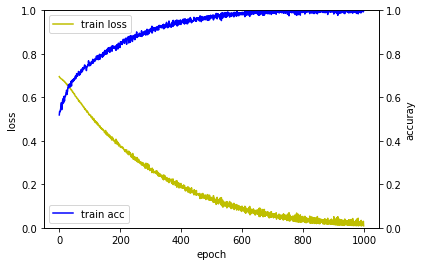

In [36]:
# 깊은 다층퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

---

### 학습결과 비교

퍼셉트론 > 다층퍼셉트론 > 깊은 다층퍼셉트론 순으로 학습이 좀 더 빨리 되는 것을 확인할 수 있습니다.

|퍼셉트론|다층퍼셉트론|깊은 다층퍼셉트론|
|:-:|:-:|:-:|
|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_6.png)|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_7.png)|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_8.png)|

---

### 결론

수치예측을 위한 퍼셉트론, 다층퍼셉트론, 깊은 다층퍼셉트론 모델을 살펴보고, 그 성능을 확인 해봤습니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_4m.png)

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)